In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../")
from softpy.fuzzy.clustering import *
from sklearn.datasets import load_iris, load_breast_cancer, load_digits, load_wine
from matplotlib.colors import LinearSegmentedColormap, to_rgba
from matplotlib.cm import ScalarMappable
import matplotlib as mpl
from matplotlib.colors import Normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.utils import resample

palette = mpl.colormaps["Blues"]
errors = mpl.colormaps["Reds"]

In [2]:
for k in sys.modules.keys():
    if "softpy" in k:
        print(k)

softpy.fuzzy.memberships_function
softpy.fuzzy.fuzzyset
softpy.fuzzy.fuzzy_partition
softpy.fuzzy.clustering
softpy.fuzzy.operations
softpy.fuzzy.fuzzy_operation
softpy.fuzzy.fuzzy_rule
softpy.fuzzy.knowledge_base
softpy.fuzzy.fuzzy_control
softpy.fuzzy
softpy.evolutionary.candidate
softpy.evolutionary.utils
softpy.evolutionary.singlestate
softpy.evolutionary.genetic
softpy.evolutionary.selection
softpy.evolutionary
softpy


# Partitive Clustering

$\min_c \min_u \sum_{i=1}^k \sum_{j=1}^m u_{i,j}^{\frac{2}{1-w}} d_{i,j}$

subject to

$u_{i,j} \in [0,1]$

$\forall j, \sum_{i=1}^k u_{i,j} = 1$




when $d_{i,j} = \sum_{l=1}^d (x_{j,d} - c_{i,d})^2$ then we obtain k-means

Select clusters at random

Compute $d_{i,j}^{\frac{2}{1-w}}$, normalize $d_{i,j}^{\frac{2}{1-w}}/\sum_{l=1}^k d_{l,j}^{\frac{2}{1-w}}$

Update centroids $c_i = \frac{\sum_{j=1}^n u_{i,j}^{\frac{2}{1-w}} x_j}{\sum_{j=1}^n u_{i,j}^{\frac{2}{1-w}}}$

In [3]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import pairwise_distances

def remap_labels(X, labels1, labels2):
    costs = np.zeros((len(np.unique(labels1)), len(np.unique(labels2))))
    for i in np.unique(labels1):
        X1 = X[labels1 == i,:]
        
        for j in np.unique(labels2):
            X2 = X[labels2 == j,:]
            dists = pairwise_distances(X1, X2)
            row_ind, col_ind = linear_sum_assignment(dists)
            costs[i,j]  = dists[row_ind, col_ind].sum()
            
    return linear_sum_assignment(costs)

(150, 150)

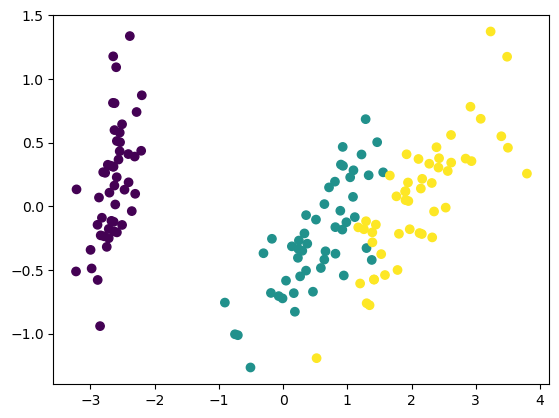

In [4]:
X, y = load_iris(return_X_y=True)

pca = PCA(n_components=2)
X_red = pca.fit_transform(X)

classes = len(np.unique(y))

plt.scatter(X_red[:,0], X_red[:, 1], c=y)

pairwise_distances(X,X).shape

# Fuzzy C-Means

In [5]:
fcm = FuzzyCMeans(n_clusters=classes, fuzzifier=1.02)
fcm.fit(X)
y_pred = fcm.predict(X)
y_proba = fcm.predict_proba(X)
y_fuzzy = fcm.predict_fuzzy(X)

Text(0.5, 1.0, 'Membership')

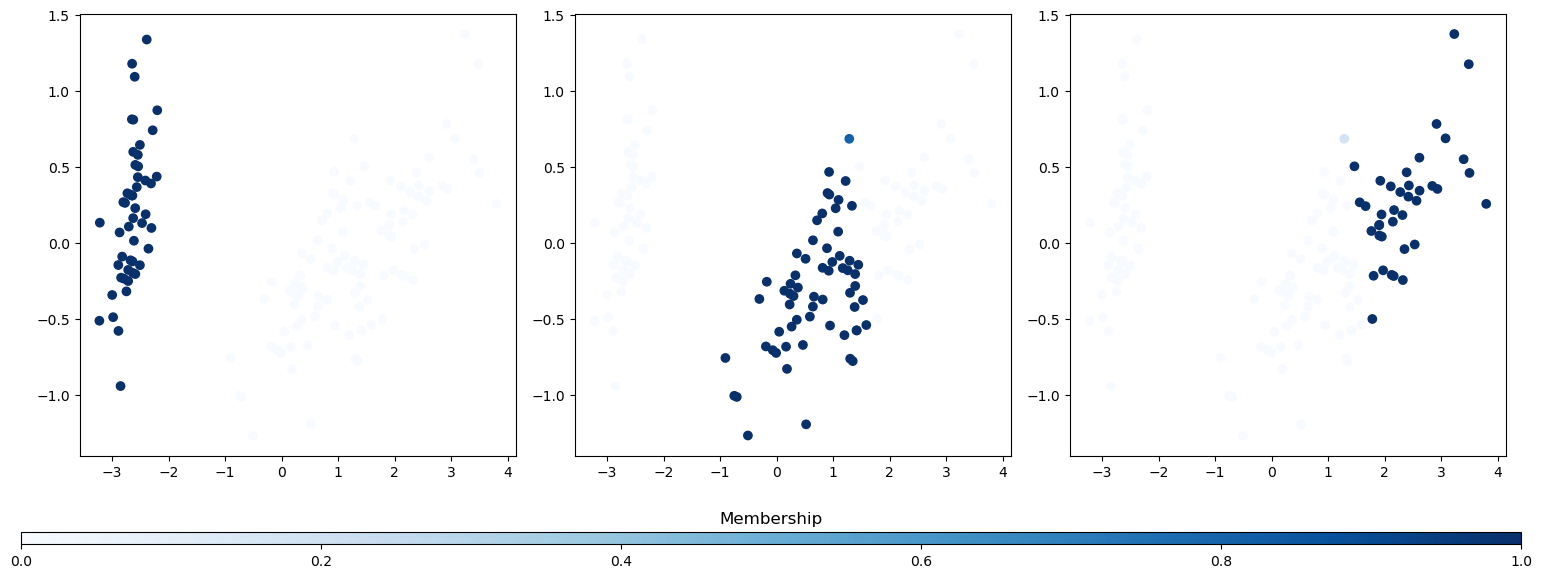

In [6]:
fig, axs = plt.subplots(1,classes, figsize=(5*classes,5))

for i in range(classes):
    axs[i].scatter(X_red[:,0], X_red[:, 1], c=y_proba[:,i], cmap=palette)

fig.tight_layout()

im=ScalarMappable(cmap=palette, norm=Normalize(0,1))
cbar_ax = fig.add_axes([0, -0.1, 1, 0.025])
fig.colorbar(im, ax=axs.ravel().tolist(), orientation='horizontal', cax=cbar_ax)
cbar_ax.set_title("Membership")


Text(0.5, 1.0, 'Membership')

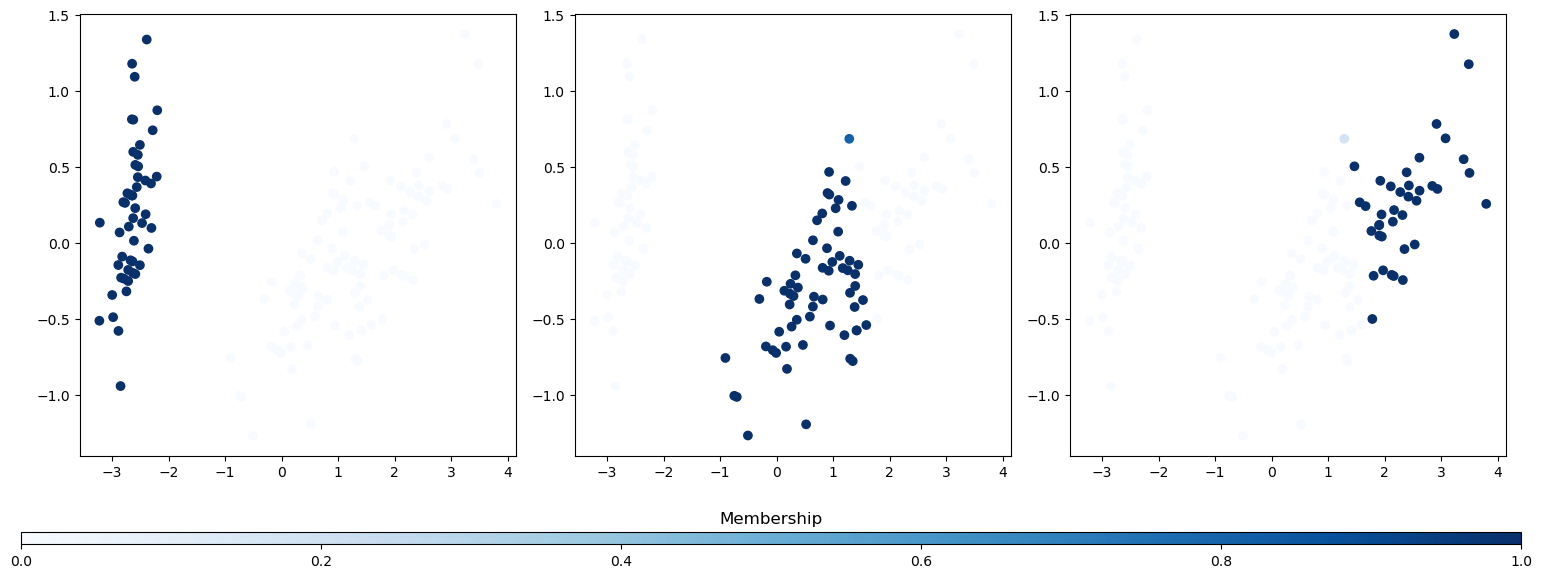

In [7]:
fig, axs = plt.subplots(1,classes, figsize=(5*classes,5))

for n in y_fuzzy.get_fuzzy_set_names():
    i = int(n)
    axs[i].scatter(X_red[:,0], X_red[:, 1], c=y_fuzzy[n].memberships, cmap=palette)

fig.tight_layout()

im=ScalarMappable(cmap=palette, norm=Normalize(0,1))
cbar_ax = fig.add_axes([0, -0.1, 1, 0.025])
fig.colorbar(im, ax=axs.ravel().tolist(), orientation='horizontal', cax=cbar_ax)
cbar_ax.set_title("Membership")


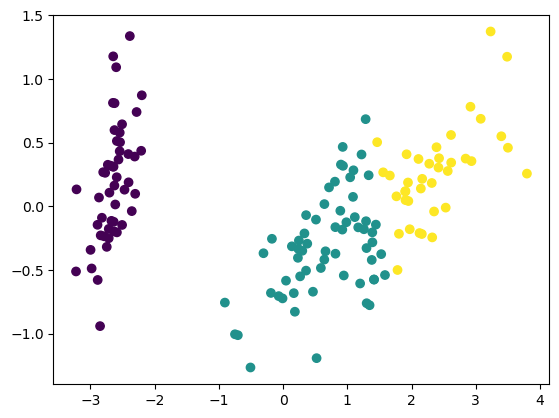

In [8]:
plt.scatter(X_red[:,0], X_red[:, 1], c=y_pred)

Accuracy 0.89


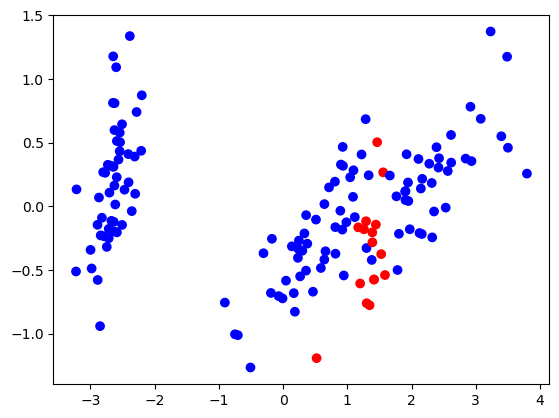

In [9]:
row_ind, col_ind = remap_labels(X, y_pred, y)
row_ind, col_ind

y_remap = [col_ind[i] for i in y_pred]
plt.scatter(X_red[:,0], X_red[:, 1], c=["b" if v else "r" for v in (y_remap==y)])
print("Accuracy %.2f" % (len(y[y==y_remap])/len(y)))

Weighted Accuracy 0.89


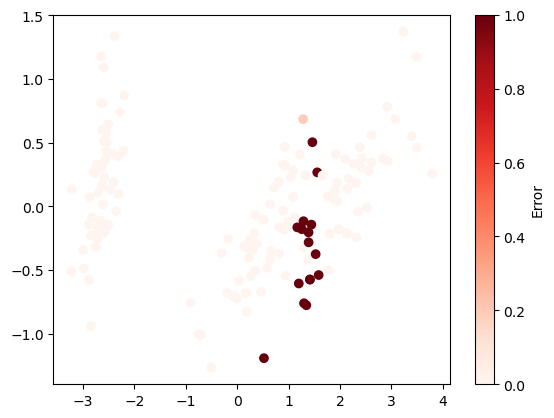

In [10]:
plt.figure()
proba_remap = y_proba[:, np.argsort(col_ind)]
errs = [1-proba_remap[i,y[i]] for i in range(len(y))]
plt.scatter(X_red[:,0], X_red[:, 1], c = errs, cmap=errors)

im=ScalarMappable(cmap=errors, norm=Normalize(0,1))
plt.colorbar(im, ax=plt.gca(), label="Error")
print("Weighted Accuracy %.2f" % (1 - np.sum(errs)/X.shape[0]))